# 01 Explore Fleurie

In this notebook, I will get info about Fleurie's geo files found.  
The geo files are found in the `data/shapefiles` and `data/geojson` directories and come from various sources:
- [Cadastre](https://cadastre.data.gouv.fr/data/etalab-cadastre/2024-04-01/geojson/france/)
- [Délimitation Parcellaire des AOC Viticoles de l'INAO](https://www.data.gouv.fr/en/datasets/delimitation-parcellaire-des-aoc-viticoles-de-linao/)

The goal of this notebook is to take advantage of Geopandas to explore the geo files and its features.

In [1]:
# Import libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

In [2]:
data_path = Path('./data')
# Look for the commune geojson file
geojson_communes_path = list(data_path.glob('**/*communes*.geojson'))
# Only one file found, as expected
geojson_communes_path

[PosixPath('data/geojson/fleurie-communes.geojson')]

In [3]:
# Read the file and display its content
commune_gdf = gpd.read_file(geojson_communes_path[0])
commune_gdf

,id,nom,created,updated,geometry
0,69084,FLEURIE,2007-10-05,2023-06-02,"MULTIPOLYGON (((4.69681 46.17382, 4.69687 46.1..."


In [4]:
# Display the CRS used
commune_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Keep the bounds of the commune
total_bounds = tuple(commune_gdf.total_bounds)
# total_bounds is a tuple with the minx, miny, maxx, maxy values
total_bounds

(4.6631481, 46.1738169, 4.7252502, 46.216595)

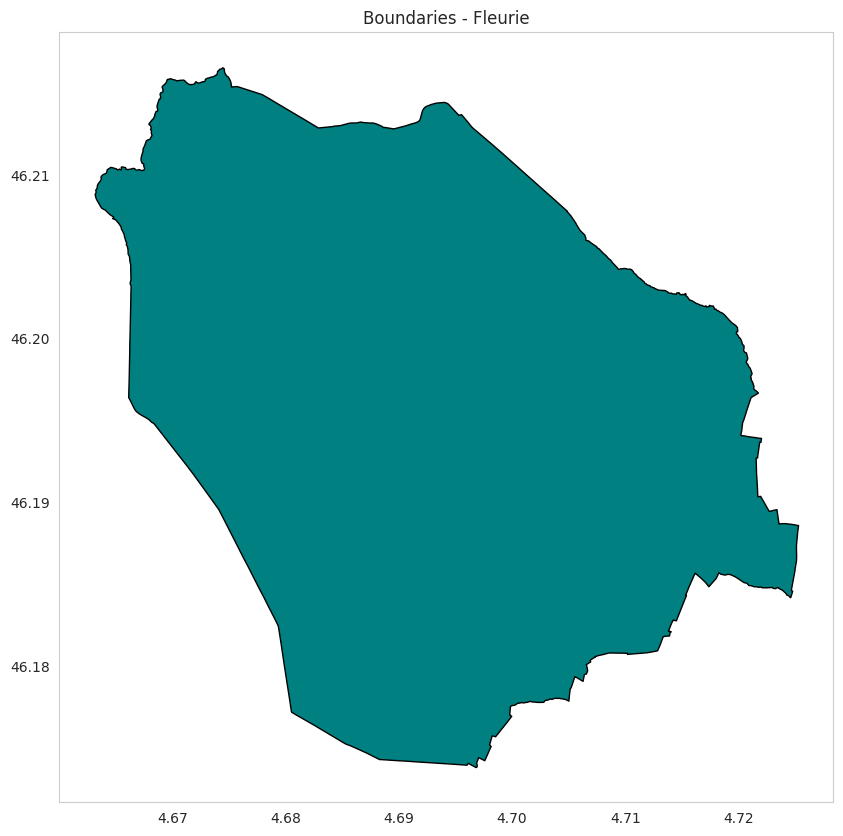

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
commune_gdf.plot(
    ax=ax,
    color='teal',
    edgecolor='k'
)
# add grid
ax.grid()
# add title
ax.set_title('Boundaries - Fleurie')
plt.show()

In [7]:
# Nos let's display the parcelles
geojson_parcelles_path = list(data_path.glob('**/*parcelles*.geojson'))
# Only one file found, as expected
geojson_parcelles_path

[PosixPath('data/geojson/fleurie-parcelles.geojson'),
 PosixPath('data/geojson/parcelles_vigne.geojson')]

In [8]:
# Read the file and display its content
parcelle_gdf = gpd.read_file(geojson_parcelles_path[0])
parcelle_gdf

,id,commune,prefixe,section,numero,contenance,arpente,created,updated,geometry
0,69084000AB0393,69084,000,AB,393,10817,False,2007-09-17,2014-02-06,"POLYGON ((4.69761 46.18880, 4.69769 46.18875, ..."
1,69084000AB0342,69084,000,AB,342,15444,False,2007-09-17,2014-02-06,"POLYGON ((4.69732 46.19123, 4.69737 46.19118, ..."
2,69084000AB0093,69084,000,AB,93,5460,False,2007-09-17,2014-02-06,"POLYGON ((4.69342 46.19233, 4.69376 46.19218, ..."
3,69084000AB0195,69084,000,AB,195,14425,False,2007-09-17,2014-02-06,"POLYGON ((4.70458 46.19070, 4.70484 46.19095, ..."
4,69084000AB0287,69084,000,AB,287,9548,False,2007-09-17,2014-02-06,"POLYGON ((4.70025 46.18966, 4.70068 46.18991, ..."
...,...,...,...,...,...,...,...,...,...,...
4218,69084000AP0004,69084,000,AP,4,42,False,2007-09-17,2014-02-06,"POLYGON ((4.70130 46.21001, 4.70122 46.21006, ..."
4219,69084000AP0022,69084,000,AP,22,3056,False,2007-09-17,2014-02-06,"POLYGON ((4.70231 46.20919, 4.70305 46.20843, ..."
4220,69084000AP0021,69084,000,AP,21,3175,False,2007-09-17,2014-02-06,"POLYGON ((4.70269 46.20824, 4.70270 46.20823, ..."
4221,69084000AP0011,69084,000,AP,11,415,False,2007-09-17,2014-02-06,"POLYGON ((4.70091 46.20829, 4.70106 46.20826, ..."


In [9]:
# display the CRS used
parcelle_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

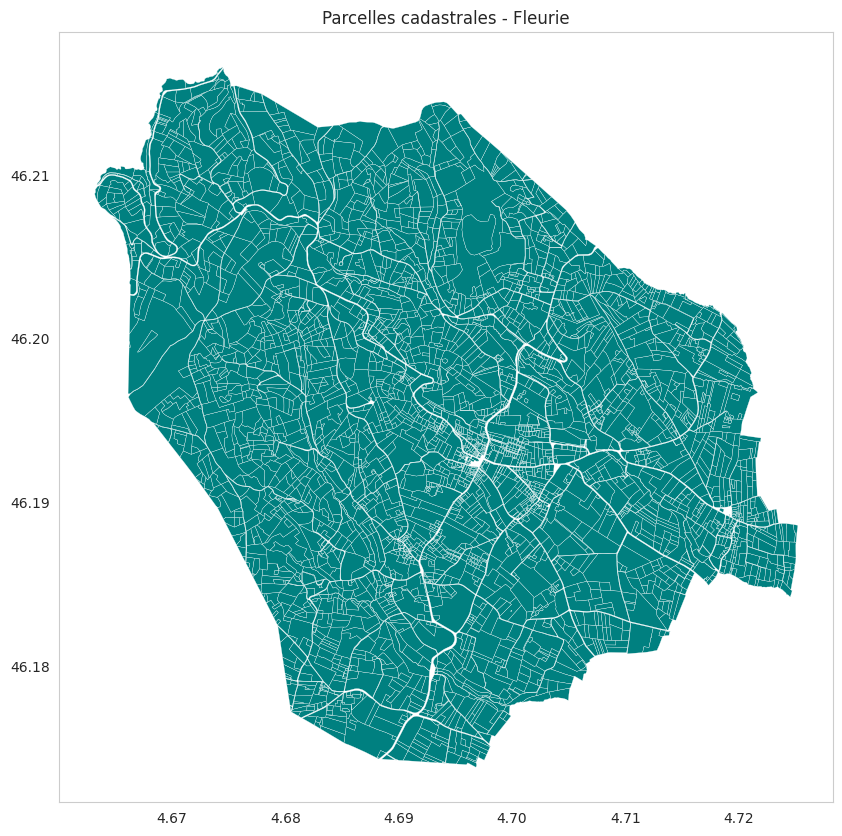

In [10]:
# Lot of information here
fig, ax = plt.subplots(figsize=(10, 10))
parcelle_gdf.plot(
    ax=ax,
    color='teal',
    edgecolor='white',
    linewidth=0.2
)
# add grid
ax.grid()
# add title
ax.set_title('Parcelles cadastrales - Fleurie')
plt.show()

In [11]:
# What about buildings
geojson_buildings_path = list(data_path.glob('**/*batiments*.geojson'))
# Only one file found, as expected
geojson_buildings_path

[PosixPath('data/geojson/fleurie-batiments.geojson')]

In [12]:
# Read the file and display its content
building_gdf = gpd.read_file(geojson_buildings_path[0])
building_gdf

,type,nom,commune,created,updated,geometry
0,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.69701 46.19046, 4.69681 46.1..."
1,01,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69814 46.18897, 4.69831 46.1..."
2,02,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69822 46.18902, 4.69827 46.1..."
3,02,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69790 46.18926, 4.69810 46.1..."
4,01,None,69084,2016-05-11,2018-04-23,"MULTIPOLYGON (((4.69799 46.18937, 4.69786 46.1..."
...,...,...,...,...,...,...
1543,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70858 46.20440, 4.70838 46.2..."
1544,02,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70858 46.20440, 4.70861 46.2..."
1545,02,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70841 46.20429, 4.70841 46.2..."
1546,01,None,69084,2007-09-17,2018-04-23,"MULTIPOLYGON (((4.70125 46.20855, 4.70115 46.2..."


In [13]:
# display the CRS used
building_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

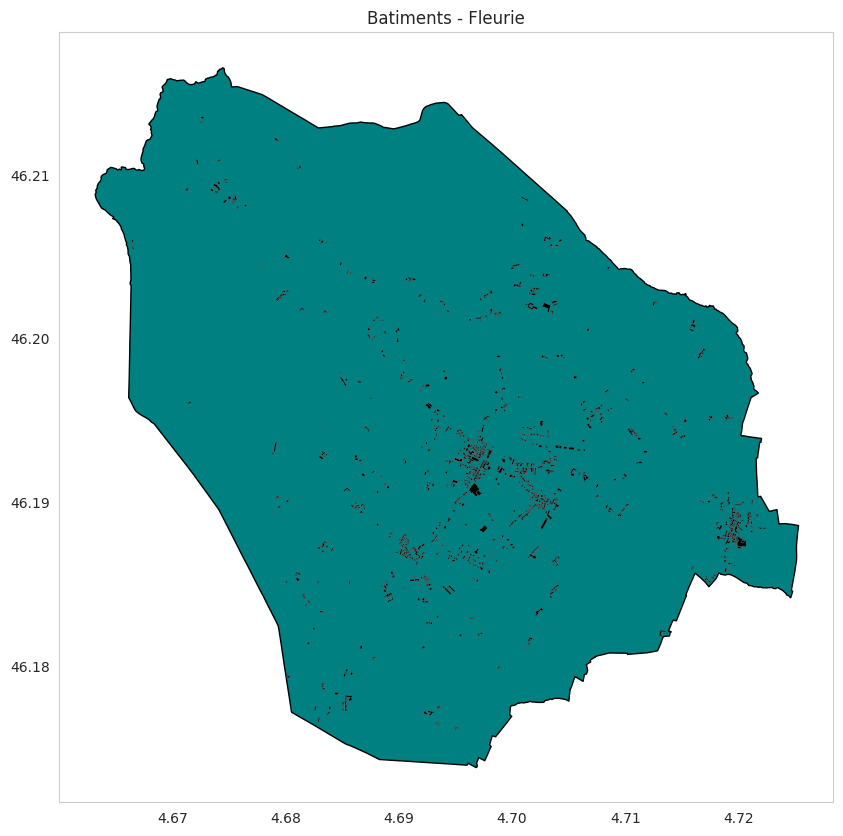

In [14]:
# Not much information here
fig, ax = plt.subplots(figsize=(10, 10))
commune_gdf.plot(
    ax=ax,
    color='teal',
    edgecolor='black'
)
building_gdf.plot(
    ax=ax,
    color='k',
    edgecolor='grey',
    linewidth=0.2
)
ax.grid(False)
# add title
ax.set_title('Batiments - Fleurie')
plt.show()

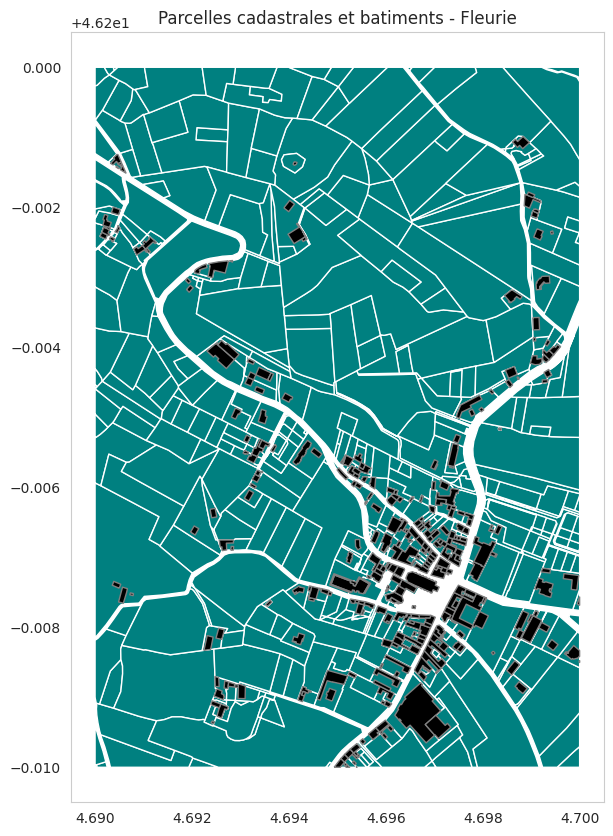

In [15]:
# clip to the center of the commune
center_boundaries = (4.69, 46.19, 4.70, 46.20)
parcelle_clip = gpd.clip(parcelle_gdf, center_boundaries)
building_clip = gpd.clip(building_gdf, center_boundaries)

fig, ax = plt.subplots(figsize=(10, 10))
parcelle_clip.plot(
    color='teal',
    edgecolor='white',
    ax=ax
)
building_clip.plot(
    color='k',
    edgecolor='grey',
    ax=ax
)
# remove grid
ax.grid(False)
# add title
ax.set_title('Parcelles cadastrales et batiments - Fleurie')
plt.show()


In [16]:
urban_path = list(data_path.glob('**/*URBA*.shp'))
urban_path

[PosixPath('data/shapefiles/zone_urba/ZONE_URBA.shp')]

In [17]:
urban = gpd.read_file(urban_path[0])

In [18]:
urban.crs

<Projected CRS: IGNF:LAMB93>
Name: RGF93 Lambert 93
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
# Convert to the same CRS as the other files
urban = urban.to_crs(parcelle_gdf.crs)
urban.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
urban.head(20)

,LIBELLE,LIBELONG,TYPEZONE,DESTDOMI,NOMFIC,URLFIC,INSEE,DATAPPRO,DATVALID,geometry
0,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.70660 46.18695, 4.70644 46.18707, ..."
1,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.69494 46.20076, 4.69491 46.20073, ..."
2,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.66601 46.20578, 4.66614 46.20560, ..."
3,A,Zone agricole a proteger en raison du potentie...,A,07,69084_reglement_20220203.pdf,None,69084,20220203,20220203,"POLYGON ((4.70546 46.19573, 4.70603 46.19531, ..."
4,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.67999 46.19244, 4.67976 46.19259, ..."
5,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.67168 46.20802, 4.67158 46.20808, ..."
6,Nzh,"Secteur de la zone N inconstructible, lie a la...",N,08,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.66609 46.20518, 4.66637 46.20518, ..."
7,UB,"Zone urbaine multifonctionnelle, immediatement...",U,03,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.71838 46.19009, 4.71836 46.18995, ..."
8,UC,"Zone urbaine immediatement constructible, de f...",U,01,69084_reglement_20220203.pdf,None,69084,20220203,20170316,"POLYGON ((4.69467 46.18709, 4.69492 46.18703, ..."
9,A,Zone agricole a proteger en raison du potentie...,A,07,69084_reglement_20220203.pdf,None,69084,20220203,20220203,"POLYGON ((4.71718 46.19099, 4.71773 46.19084, ..."


In [21]:
urban_clip = gpd.clip(urban, center_boundaries)


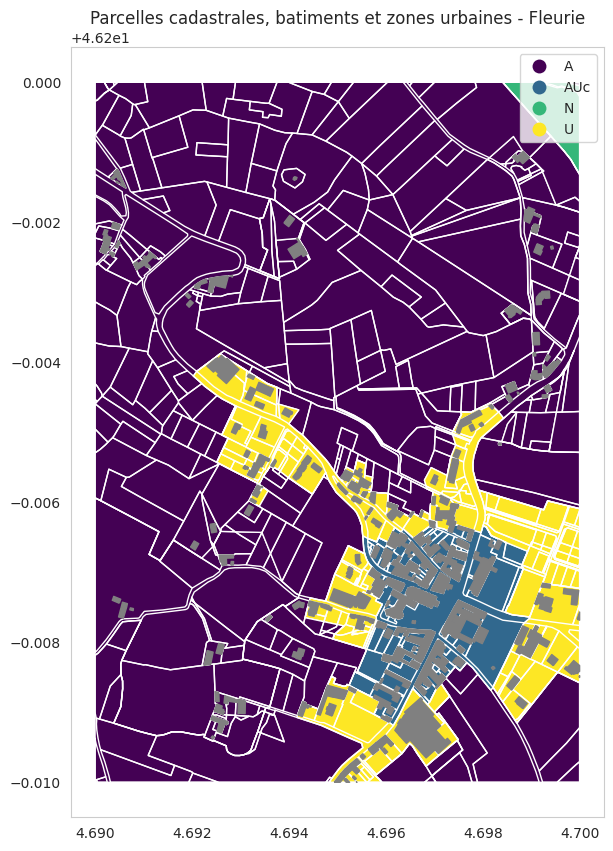

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

urban_clip.plot(
    column='TYPEZONE',
    cmap='viridis',
    ax=ax,
    legend=True,
)
parcelle_clip.plot(
    color="None",
    edgecolor='white',
    ax=ax
)
building_clip.plot(
    color="grey",
    edgecolor='grey',
    ax=ax,
)
# remove grid
ax.grid(False)
# add title
ax.set_title('Parcelles cadastrales, batiments et zones urbaines - Fleurie')
plt.show()

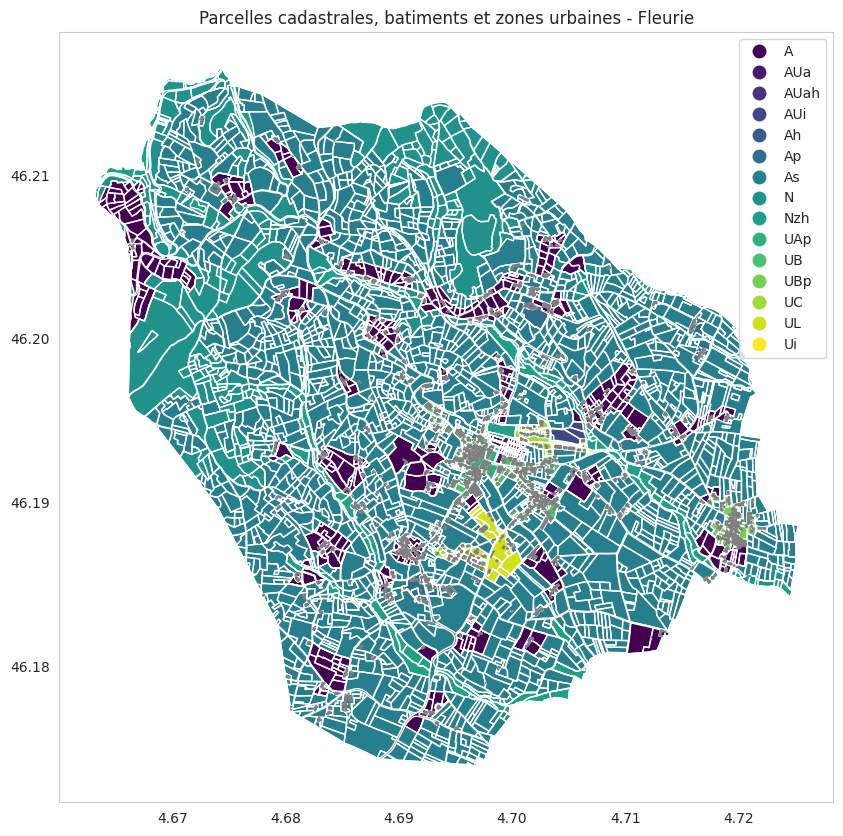

In [23]:
# Let's see the whole Fleurie
fig, ax = plt.subplots(figsize=(10, 10))
urban.plot(
    column='LIBELLE',
    cmap='viridis',
    ax=ax,
    legend=True,
)
parcelle_gdf.plot(
    color="None",
    edgecolor='white',
    ax=ax
)
building_gdf.plot(
    color="grey",
    edgecolor='grey',
    ax=ax,
)
# remove grid
ax.grid(False)
# add title
ax.set_title('Parcelles cadastrales, batiments et zones urbaines - Fleurie')
plt.show()

In [24]:
# To calculate the area of the commune, we need to convert the geometry to a local CRS: Lambert 93
commune_rfg93 = commune_gdf.to_crs(epsg=2154)
parcelle_rfg93 = parcelle_gdf.to_crs(epsg=2154)
urban_rfg93 = urban.to_crs(epsg=2154)

In [25]:
# Total area of the commune in km2
total_area = commune_rfg93.area.sum() / 10**6
# Total area of the urban zones A in km2
agriculture_area = urban_rfg93.loc[urban_rfg93['TYPEZONE'] == 'A'].area.sum() / 10**6
print(f'The total area of the commune is {total_area:.2f} km2')
print(f'The total area of the agriculture zones is {agriculture_area:.2f} km2')
print(f'The agriculture zones represent {agriculture_area / total_area:.2%} of the total area')

The total area of the commune is 13.92 km2
The total area of the agriculture zones is 10.70 km2
The agriculture zones represent 76.87% of the total area


In [26]:
# calculate the area of each zone
# do not forget to use the local CRS for the area calculation
# and convert the area to km2
urban_rfg93['area'] = urban_rfg93.area / 10**6

aggregation = {
    'area': 'sum',
    'LIBELONG': 'unique',
    'TYPEZONE': 'unique'
}

zonage_vc = urban_rfg93.groupby('LIBELLE').agg(aggregation).sort_values('area', ascending=False)
zonage_vc

,area,LIBELONG,TYPEZONE
LIBELLE,,,
As,9.189464,[Secteur de la zone A inconstructible au regar...,[A]
N,1.981168,[Zone naturelle et forestiere à proteger en ra...,[N]
A,1.489981,[Zone agricole a proteger en raison du potenti...,[A]
Nzh,0.647449,"[Secteur de la zone N inconstructible, lie a l...","[N, A]"
UB,0.181641,"[Zone urbaine multifonctionnelle, immediatemen...",[U]
Ap,0.080083,[Secteur de la zone A correspondant aux hameau...,[Ah]
UL,0.079645,[Zone urbaine a vocation de loisirs et de tour...,[U]
UC,0.074088,"[Zone urbaine immediatement constructible, de ...",[U]
UBp,0.068278,[Secteur de la zone UB patrimonial protege au...,[U]


In [27]:
# look for the vineyard parcels, file contains percellaire-aoc
parcelles_vignes_path = list(data_path.glob('**/*parcellaire-aoc*.shp'))
parcelles_vignes_path

[PosixPath('data/shapefiles/aoc/2024-05-13_delim-parcellaire-aoc-shp.shp')]

In [28]:
parcelles_vignes = gpd.read_file(parcelles_vignes_path[0], engine='pyogrio')

In [29]:
parcelles_vignes.crs

<Projected CRS: IGNF:LAMB93>
Name: RGF93 Lambert 93
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
parcelles_vignes.head()

,dt,type_prod,categorie,type_denom,signe,id_app,app,id_denom,denom,insee,cvi,nomcom,insee2011,nomcom2011,id_aire,crinao,grp_name1,grp_name2,geometry
0,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49002,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",ALLONNES,49002,ALLONNES,133,None,None,None,"MULTIPOLYGON (((476099.070 6692210.880, 476039..."
1,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49003,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",TUFFALUN,"49003,49181,49230","AMBILLOU-CHATEAU,LOUERRE,NOYANT-LA-PLAINE",133,None,None,None,"MULTIPOLYGON (((445501.950 6686844.110, 445500..."
2,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49007,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",ANGERS,49007,ANGERS,133,None,None,None,"MULTIPOLYGON (((430316.540 6711699.870, 430309..."
3,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49011,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",ARTANNES-SUR-THOUET,49011,ARTANNES-SUR-THOUET,133,None,None,None,"MULTIPOLYGON (((464573.710 6682292.770, 464576..."
4,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49012,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",AUBIGNE-SUR-LAYON,49012,AUBIGNE-SUR-LAYON,133,None,None,None,"MULTIPOLYGON (((436373.512 6685585.834, 436394..."


In [31]:
# The sjoin method between parcelles and percelles_vines does not work
# because parcelles do not match
# So, the use of overlay allows to get the intersection of the two geometies
parcelles_vignes_fleurie = gpd.overlay(parcelles_vignes, commune_rfg93, how='intersection')

In [32]:
# from urban_rfg93, get typezone= A
urban_rfg93_a = urban_rfg93[urban_rfg93['TYPEZONE'] == 'A']

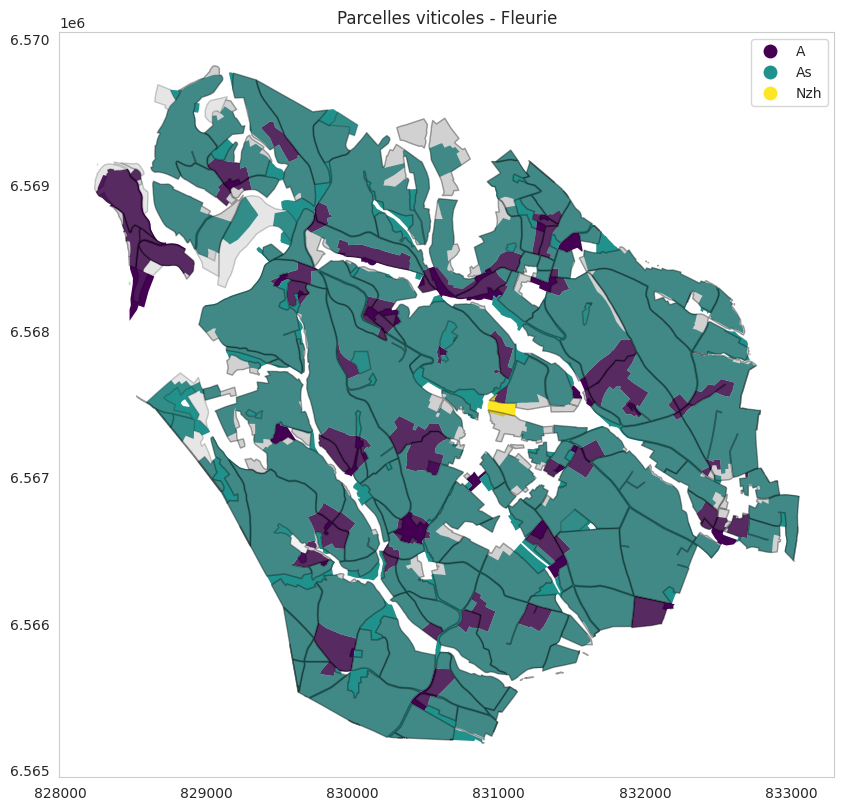

In [33]:
# plot the vineyard parcels according to the AOC data
# and the urban zones A

fig, ax = plt.subplots(figsize=(10, 10))

urban_rfg93_a.plot(
    column='LIBELLE',
    edgecolor='None',
    cmap='viridis',
    legend=True,
    ax=ax
)
parcelles_vignes_fleurie.plot(
    color='grey',
    edgecolor='k',
    ax=ax,
    alpha=0.1
)
ax.grid(False)
# add title
ax.set_title('Parcelles viticoles - Fleurie')
plt.show()

In [34]:
# Does not fit well with the urban zones
# We should avoid using the AOC data

In [35]:
# Save urban zones A to a file as agricultural zones to geojson
urban_rfg93_a.to_file(data_path / 'geojson' / 'urban_zones_a.geojson', driver='GeoJSON')

In [36]:
urban_a_dissolve = urban_rfg93_a.dissolve()

<Axes: >

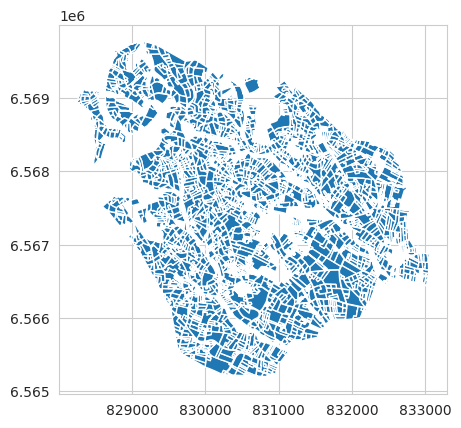

In [37]:
fleurie_parcelles_vigne = gpd.overlay(parcelle_rfg93, urban_a_dissolve, how='intersection')
fleurie_parcelles_vigne.plot()

In [38]:
# Save the vineyard parcels to a file as geojson
fleurie_parcelles_vigne.to_file(data_path / 'geojson' / 'parcelles_vigne.geojson', driver='GeoJSON')